# Trajectory Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
%matplotlib inline

Specify working directory (where the trajectory is located and where the analysis will take place):

In [2]:
work_dir = '/home/eva/Documents/gbsa-sims/sims-1/CC-Hex/3r3k_T/GLH/dcd/'

Specify topology directory (where the prmtop input file is stored):

In [6]:
top_dir = '/home/eva/Documents/structures/structures-gbn2-ff99SB/CC-Hex/3r3k_T/GLH/'

Loading the trajectory and topology files:

In [7]:
traj = md.load(work_dir+'3r3k_T_GLH_output.dcd', top = top_dir+'3r3k_T_GLH.prmtop')

Excluding the first 20 ns (5000 frames):

In [8]:
traj_trunc = md.iterload(work_dir+'3r3k_T_GLH_output.dcd', top = top_dir+'3r3k_T_GLH.prmtop', chunk = 0, skip = 5000)

Getting the truncated trajectory (note: traj_trunc is an iterator)

In [9]:
for tr in traj_trunc:
    traj_short = tr
print(traj_short)

<mdtraj.Trajectory with 45000 frames, 2904 atoms, 192 residues, without unitcells>


In [10]:
traj_short.topology

<mdtraj.Topology with 1 chains, 192 residues, 2904 atoms, 2904 bonds at 0x7faf00c50340>

## Structure

Separating the amino acids and the ACE-NH2 caps, and creating lists for their indexes:

In [11]:
res_obj = traj.topology.residues
res_list=[]
caps_positions =[]
all_residues=[]


for res in res_obj:
        all_residues.append(str(res))
        if res.name == 'ACE' or res.name == 'NHE':
            print('excluding the ACE and NH2 caps')
            caps_positions.append(str(res))
        else:
            res_list.append(str(res))
            
res_idx=[]
for res in res_list:
    res_idx.append(int(res[3:6]))
    
caps_idx=[]
for cap in caps_positions:
    caps_idx.append(int(cap[3:6]))
    
all_residues_idx=[]
for re in all_residues:
    all_residues_idx.append(int(re[3:6]))

excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps
excluding the ACE and NH2 caps


Separating the individual chains (based on the positions of the caps):

In [12]:
chain_number = int(len(caps_idx)/2)
print('the number of chains in the structure is', chain_number)

the number of chains in the structure is 6


Separating the caps by type:

In [13]:
ace=caps_idx[0::2]
nh2=caps_idx[1::2]

In [14]:
print('the ACE positions are', ace)
print('the NH2 positions are', nh2)

the ACE positions are [0, 32, 64, 96, 128, 160]
the NH2 positions are [31, 63, 95, 127, 159, 191]


In [15]:
chain_list=[]
chain=[]
chain_idx = []
all_idx=[]

for i in range(len(ace)):
    chain = all_residues[(ace[i]+1):(nh2[i])]
    chain_list.append(chain)
    chain=[]

for ch in chain_list:
    for re in ch:
        all_idx.append(int(re[3:6]))    

for i in range(len(ace)):
    chain = all_residues_idx[(ace[i]+1):(nh2[i])]
    chain_idx.append(chain)
    chain=[]

In [27]:
chain_length = len(chain_idx[0])

We can view the sequence and residue indexes of a single chain with:

In [ ]:
#chain_list[0]

In [ ]:
#chain_idx[0]

Creating an array for time (4 fs timestep, 200 ns simulation time):

In [18]:
t = np.arange(0.0, 200.0, 0.004)

In [19]:
t_trunc = np.arange(20.0, 200.0, 0.004)

## RMSD calculation

Getting the syntax for the atom expression:

In [17]:
selection = traj.topology.select_expression('backbone')
print(selection)

[atom.index for atom in topology.atoms if atom.is_backbone
]


Calculating the RMSD from the first frame (initial structure), for the backbone atoms:

In [20]:
rmsds = md.rmsd(traj, traj, 0, atom_indices = [a.index for a in traj.topology.atoms if a.is_backbone])

Calculating the normalised RMSD100 for the backbone atoms:

In [28]:
rmsds_100 = []

for rmsd in rmsds:
    rmsds_100.append(rmsd/(1+np.log(np.sqrt(chain_number*chain_length/100))))

Creating the RMSD plot:

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, rmsds)
ax.set(xlabel='t (ns)', ylabel='RMSD (nm)', title='RMSD')
ax.grid()

fig.savefig(work_dir+'analysis/rmsd.png')
plt.show()

Creating the RMSD100 plot

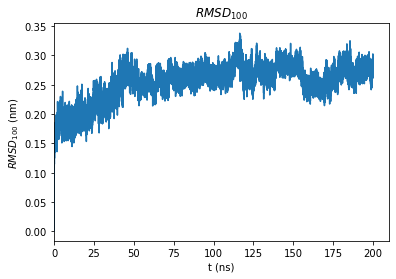

In [40]:
fig,ax = plt.subplots()
ax.plot(t, rmsds_100)
ax.set(xlabel='t (ns)', ylabel='$RMSD_{100}$ (nm)', title='$RMSD_{100}$')
#ax.grid()
ax.set_xlim([0.0, 210.0])

fig.savefig(work_dir+'analysis/rmsd_100.png')
plt.show()

Plotting the RMSDs for the truncated trajectory:

In [41]:
rmsds_trunc = md.rmsd(traj_short, traj, 0, atom_indices = [a.index for a in traj.topology.atoms if a.is_backbone])

In [ ]:
fig,ax = plt.subplots()
ax.plot(t_trunc, rmsds_trunc)
ax.set(xlabel='t (ns)', ylabel='RMSD (nm)', title='RMSD')
ax.grid()

fig.savefig(work_dir+'analysis/rmsd-trunc.png')
plt.show()

In [42]:
rmsds_trunc_100 = []

for rmsd in rmsds_trunc:
    rmsds_trunc_100.append(rmsd/(1+np.log(np.sqrt(chain_number*chain_length/100))))

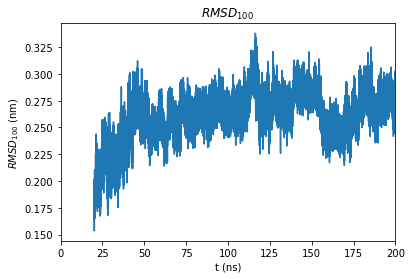

In [46]:
fig,ax = plt.subplots()
ax.plot(t_trunc, rmsds_trunc_100)
ax.set(xlabel='t (ns)', ylabel='$RMSD_{100}$ (nm)', title='$RMSD_{100}$')
#ax.grid()
ax.set_xlim([0.0, 200.0])
#ax.set_ylim([0.0, 1.0])

fig.savefig(work_dir+'analysis/rmsd-trunc-100.png')
plt.show()

#### Comparison between different systems

In [47]:
work_dir_2 = work_dir+'replicate-2/'

In [48]:
top_dir_2 = top_dir

In [49]:
traj_2 = md.load(work_dir_2+'output-2.dcd', top = top_dir_2+'3r3k_T_GLH.prmtop')

In [50]:
traj_trunc_2 = md.iterload(work_dir_2+'output-2.dcd', top = top_dir_2+'3r3k_T_GLH.prmtop', chunk = 0, skip = 5000)

In [51]:
for tr_2 in traj_trunc_2:
    traj_short_2 = tr_2
print(traj_short_2)

<mdtraj.Trajectory with 45000 frames, 2904 atoms, 192 residues, without unitcells>


In [52]:
rmsds_trunc_2 = md.rmsd(traj_short_2, traj_2, 0, atom_indices = [a.index for a in traj_2.topology.atoms if a.is_backbone])

In [53]:
rmsds_trunc_2_100 =[]
for rmsd in rmsds_trunc_2:
    rmsds_trunc_2_100.append(rmsd/(1+np.log(np.sqrt(chain_number*chain_length/100))))

In [54]:
work_dir_3 = work_dir+'replicate-3/'

In [55]:
top_dir_3 = top_dir

In [56]:
traj_3 = md.load(work_dir_3+'output-3.dcd', top = top_dir_3+'3r3k_T_GLH.prmtop')

In [57]:
traj_trunc_3 = md.iterload(work_dir_3+'output-3.dcd', top = top_dir_3+'3r3k_T_GLH.prmtop', chunk = 0, skip = 5000)

In [58]:
for tr_3 in traj_trunc_3:
    traj_short_3 = tr_3
print(traj_short_3)

<mdtraj.Trajectory with 45000 frames, 2904 atoms, 192 residues, without unitcells>


In [59]:
rmsds_trunc_3 = md.rmsd(traj_short_3, traj_3, 0, atom_indices = [a.index for a in traj_3.topology.atoms if a.is_backbone])

In [60]:
rmsds_trunc_3_100 = []
for rmsd in rmsds_trunc_3:
    rmsds_trunc_3_100.append(rmsd/(1+np.log(np.sqrt(chain_number*chain_length/100))))

In [ ]:
fig,ax = plt.subplots()
ax.plot(t_trunc, rmsds_trunc, label = 'replicate 1')
ax.plot(t_trunc, rmsds_trunc_2, label = 'replicate 2', color = 'darkorange')
ax.plot(t_trunc, rmsds_trunc_3, label = 'replicate 3', color = 'yellowgreen')

ax.set(xlabel='t (ns)', ylabel='RMSD (nm)', title='CC-Hex*-L24E-hex, all E deprotonated')
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')
ax.set_ylim([0.0, 1.0])

fig.savefig(work_dir+'analysis/rmsd-trunc-comparison-between-replicates.png', bbox_inches="tight")

plt.show()

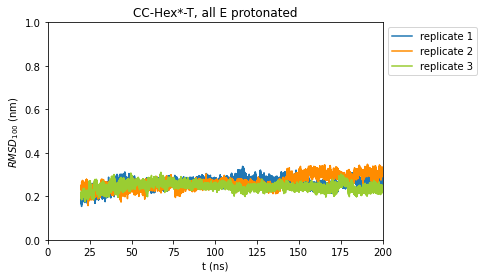

In [62]:
fig,ax = plt.subplots()
ax.plot(t_trunc, rmsds_trunc_100, label = 'replicate 1')
ax.plot(t_trunc, rmsds_trunc_2_100, label = 'replicate 2', color = 'darkorange')
ax.plot(t_trunc, rmsds_trunc_3_100, label = 'replicate 3', color = 'yellowgreen')

ax.set(xlabel='t (ns)', ylabel='$RMSD_{100}$ (nm)', title='CC-Hex*-T, all E protonated')
#ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')
ax.set_xlim([0.0, 200.0])
ax.set_ylim([0.0, 1.0])

fig.savefig(work_dir+'analysis/rmsd-trunc-100-comparison-between-replicates.png', bbox_inches="tight")

plt.show()

## RMSF calculation

Getting the syntax for the atom selection:

In [ ]:
selection = traj.topology.select_expression('name CA')
print(selection)

Calculating the RMSF from the first frame (initial structure) for the CA atoms:

In [ ]:
rmsfs = md.rmsf(traj, traj, 0, atom_indices = [a.index for a in traj.topology.atoms if a.name == 'CA'])

Creating the RMSF plot (per assembly): 

In [ ]:
fig,ax = plt.subplots()
ax.plot(res_idx, rmsfs)
ax.set(xlabel='residue number', ylabel='RMSF (nm)', title='RMSF')
ax.grid()

fig.savefig(work_dir+'analysis/rmsf.png')
plt.show()

There is a big difference between the RMSF values of the first two residues.

In [ ]:
print(rmsfs[0])
print(rmsfs[1])

Creating the RMSF plot per assembly and excluding the first residue:

In [ ]:
fig,ax = plt.subplots()
ax.plot(res_idx[1:], rmsfs[1:])
ax.set(xlabel='residue number', ylabel='RMSF (nm)', title='RMSF')
ax.grid()

fig.savefig(work_dir+'analysis/rmsf-no-first-residue.png')
plt.show()

Creating the RMSF plot per chain (example: first chain)

In [ ]:
fig,ax = plt.subplots()
ax.plot(chain_idx[0], rmsfs[0*chain_length:1*chain_length])
ax.set(xlabel='residue number', ylabel='RMSF (nm)', title='RMSF')
ax.grid()

fig.savefig(work_dir+'analysis/rmsf-per-chain-1.png')
plt.show()

In [ ]:
#rmsfs[1*chain_length:2*chain_length] #second chain residues

In [ ]:
#rmsfs[2*chain_length:3*chain_length] #third chain, and so on...

Excluding the first residue:

In [ ]:
fig,ax = plt.subplots()
ax.plot(chain_idx[0][1:], rmsfs[0*chain_length:1*chain_length][1:])
ax.set(xlabel='residue number', ylabel='RMSF (nm)', title='RMSF')
ax.grid()

fig.savefig(work_dir+'analysis/rmsf-per-chain-1-no-first-residue.png')
plt.show()

#### RMSF - all individual chains in one graph

In [ ]:
fig,ax = plt.subplots()
ax.plot(chain_idx[0], rmsfs[0*chain_length:1*chain_length], label = "A")
ax.plot(chain_idx[0], rmsfs[1*chain_length:2*chain_length], label = "B")
ax.plot(chain_idx[0], rmsfs[2*chain_length:3*chain_length], label = "C")
ax.plot(chain_idx[0], rmsfs[3*chain_length:4*chain_length], label = "D")
#ax.plot(chain_idx[0], rmsfs[4*chain_length:5*chain_length], label = "E")
#ax.plot(chain_idx[0], rmsfs[5*chain_length:6*chain_length], label = "F")

ax.set(xlabel='residue number', ylabel='RMSF (nm)', title='RMSF')
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'analysis/rmsf-per-chain-multiple.png', bbox_inches="tight")
plt.show()

Excluding the first residue (from A chain only):

In [ ]:
fig,ax = plt.subplots()

ax.plot(chain_idx[0][1:], rmsfs[0*chain_length:1*chain_length][1:], label = "A")
ax.plot(chain_idx[0], rmsfs[1*chain_length:2*chain_length], label = "B")
ax.plot(chain_idx[0], rmsfs[2*chain_length:3*chain_length], label = "C")
ax.plot(chain_idx[0], rmsfs[3*chain_length:4*chain_length], label = "D")
#ax.plot(chain_idx[0], rmsfs[4*chain_length:5*chain_length], label = "E")
#ax.plot(chain_idx[0], rmsfs[5*chain_length:6*chain_length], label = "F")


ax.set(xlabel='residue number', ylabel='RMSF (nm)', title='RMSF')
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'analysis/rmsf-per-chain-multiple-no-first-residue.png', bbox_inches="tight")
plt.show()

#### Comparison between different systems/replicates

In [ ]:
rmsfs_2 = md.rmsf(traj_2, traj_2, 0, atom_indices = [a.index for a in traj_2.topology.atoms if a.name == 'CA'])

In [ ]:
rmsfs_3 = md.rmsf(traj_3, traj_3, 0, atom_indices = [a.index for a in traj_3.topology.atoms if a.name == 'CA'])

In [ ]:
fig,ax = plt.subplots()
ax.plot(res_idx[1:], rmsfs[1:], label='replicate 1')
ax.plot(res_idx[1:], rmsfs_2[1:], label='replicate 2', color='darkorange')
ax.plot(res_idx[1:], rmsfs_3[1:], label='replicate 3', color='yellowgreen')

ax.set(xlabel='residue number', ylabel='RMSF (nm)', title='RMSF')
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'analysis/rmsf-comparison.png', bbox_inches='tight')
plt.show()

## Secondary structure calculation

In [ ]:
sec_struct = md.compute_dssp(traj, simplified = False)
print(sec_struct)

Simplified secondary structure: H = helix, C = coil, E = strand

In [ ]:
sec_struct_simple = md.compute_dssp(traj, simplified=True)
print(sec_struct_simple)

In [ ]:
frames = len(sec_struct_simple)
print('the number of frames is', frames)

Saving the secondary structure of each residue in the struct_list:

In [ ]:
idx = 0
struct_list=[]
resid_list=[]
aa = len(all_residues) #the number of total residues in the assembly

for idx in range(0, aa):
    for frame in sec_struct_simple:
        resid_list.append(frame[idx])
    struct_list.append(resid_list)
    resid_list=[]

Getting the secondary structure of the i-th residue with struct_list[i-1] (across the whole simulation):

In [ ]:
#print(struct_list[0])
#print(len(struct_list[9]))

Note that this includes the ACE and NH2 caps (sec. struct 'NA').

### Helicity per residue calculation

The res_list contains all residues with their residue number, whereas the res_idx contains just the residue number (ACE and NH2 caps excluded)

In [ ]:
#print(res_list)
#print(res_idx)

Calculating the helicity per residue - excluding caps:

In [ ]:
count = 0
helicity_per_residue = []
helicity = 0

for res in struct_list:
    if 'NA' in res:
        print('excluding the ACE and NH2 caps')   
    else:
        for snapshot in res:
            if snapshot == 'H':
                count+=1
            helicity = (count/frames)*100
        helicity_per_residue.append(helicity)
        count=0

In [ ]:
#len(helicity_per_residue)
#print(helicity_per_residue)

Creating the %helicity per residue plot:

In [ ]:
fig,ax = plt.subplots()
ax.plot(res_idx, helicity_per_residue)
ax.set(xlabel='residue number', ylabel='%helicity per residue', title='%helicity per residue')
ax.grid()

fig.savefig(work_dir+'analysis/hpr.png')
plt.show()

### Helicity per chain calculation

In [ ]:
fig,ax = plt.subplots()
ax.plot(chain_idx[0], helicity_per_residue[0*chain_length:1*chain_length])
ax.set(xlabel='residue number', ylabel='%helicity per residue', title='%helicity per residue')
ax.grid()

fig.savefig(work_dir+'analysis/hpr-per-chain-1.png')
plt.show()

#### Helicity per residue plot - all individual chains in one graph

In [ ]:
fig,ax = plt.subplots()
ax.plot(chain_idx[0], helicity_per_residue[0*chain_length:1*chain_length], label = "A")
ax.plot(chain_idx[0], helicity_per_residue[1*chain_length:2*chain_length], label = "B")
ax.plot(chain_idx[0], helicity_per_residue[2*chain_length:3*chain_length], label = "C")
ax.plot(chain_idx[0], helicity_per_residue[3*chain_length:4*chain_length], label = "D")
#ax.plot(chain_idx[0], helicity_per_residue[4*chain_length:5*chain_length], label = "E")
#ax.plot(chain_idx[0], helicity_per_residue[5*chain_length:6*chain_length], label = "F")

ax.set(xlabel='residue number', ylabel='%helicity per residue', title='%helicity per residue')
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'analysis/hpr-per-chain-multiple.png', bbox_inches="tight")
plt.show()

Comparison between different replicates

In [ ]:
sec_struct_simple_2 = md.compute_dssp(traj_2, simplified=True)
print(sec_struct_simple_2)

In [ ]:
sec_struct_simple_3 = md.compute_dssp(traj_3, simplified=True)
print(sec_struct_simple_3)

In [ ]:
idx = 0
struct_list=[]
resid_list=[]
aa = len(all_residues) #the number of total residues in the assembly

for idx in range(0, aa):
    for frame in sec_struct_simple_2:
        resid_list.append(frame[idx])
    struct_list.append(resid_list)
    resid_list=[]

In [ ]:
count = 0
helicity_per_residue_2 = []
helicity = 0

for res in struct_list:
    if 'NA' in res:
        print('excluding the ACE and NH2 caps')   
    else:
        for snapshot in res:
            if snapshot == 'H':
                count+=1
            helicity = (count/frames)*100
        helicity_per_residue_2.append(helicity)
        count=0

In [ ]:
idx = 0
struct_list=[]
resid_list=[]
aa = len(all_residues) #the number of total residues in the assembly

for idx in range(0, aa):
    for frame in sec_struct_simple_3:
        resid_list.append(frame[idx])
    struct_list.append(resid_list)
    resid_list=[]

In [ ]:
count = 0
helicity_per_residue_3 = []
helicity = 0

for res in struct_list:
    if 'NA' in res:
        print('excluding the ACE and NH2 caps')   
    else:
        for snapshot in res:
            if snapshot == 'H':
                count+=1
            helicity = (count/frames)*100
        helicity_per_residue_3.append(helicity)
        count=0

In [ ]:
fig,ax = plt.subplots()
ax.plot(res_idx, helicity_per_residue, label='replicate 1')
ax.plot(res_idx, helicity_per_residue_2, label='replicate 2', color='darkorange')
ax.plot(res_idx, helicity_per_residue_3, label='replicate 3', color='yellowgreen')
ax.set(xlabel='residue number', ylabel='%helicity per residue', title='%helicity per residue')
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')
fig.savefig(work_dir+'analysis/hpr-comp.png', bbox_inches='tight')
plt.show()

## Hydrogen bonds calculation

Each row in the resulting array contains the donor atom, the hydrogen atom and the acceptor atom indices.

In [ ]:
#hbonds = md.baker_hubbard(traj, freq=0.1, exclude_water=True, periodic=False, sidechain_only=False, distance_cutoff=0.25, angle_cutoff=120)

#print(hbonds)

In [ ]:
#label = lambda hbond : '%s -- %s' % (traj.topology.atom(hbond[0]), traj.topology.atom(hbond[2]))

In [ ]:
#for hbond in hbonds:
  #  print (label(hbond))

# Radius of gyration calculation

Calculating the radius of gyration for each simulation frame

In [ ]:
rog = md.compute_rg(traj)

In [ ]:
rog

Calculating the mean radius of gyration:

In [ ]:
rog_mean = np.mean(rog)
rog_mean

Plotting the radius of gyration over the course of the simulation:

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, rog)
ax.set(xlabel='t (ns)', ylabel='Radius of gyration (nm)', title='Radius of gyration')
ax.grid()

fig.savefig(work_dir+'analysis/rog.png')
plt.show()

Comparing between different systems/replicates:

In [ ]:
combo = 'ff96/GBn'

In [ ]:
rog_2 = md.compute_rg(traj_2)

rog_mean_2 = np.mean(rog_2)
rog_mean_2

In [ ]:
rog_3 = md.compute_rg(traj_3)

rog_mean_3 = np.mean(rog_3)
rog_mean_3

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, rog, label = 'replicate 1')
ax.plot(t, rog_2, label = 'replicate 2', color = 'darkorange')
ax.plot(t, rog_3, label = 'replicate 3', color = 'yellowgreen')

ax.set(xlabel='t (ns)', ylabel='Radius of gyration (nm)', title=combo)
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'analysis/rog-comparison.png', bbox_inches="tight")
plt.show()

# End-to-end distance calculation

end-to-end distance = distance between the first and last alpha carbon atoms

In [ ]:
traj.topology.atoms

In [ ]:
selection = traj.topology.select_expression('name CA and resid 1')
print(selection)

In [ ]:
chain_length

In [ ]:
traj.topology.residue(int(chain_length))

In [ ]:
first_ca = [atom.index for atom in traj.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 1))]

In [ ]:
first_ca

In [ ]:
last_ca = [atom.index for atom in traj.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == chain_length))]

In [ ]:
last_ca

In [ ]:
ca_end = np.array([[first_ca[0], last_ca[0]], [0,0]])

In [ ]:
ca_end

In [ ]:
end_to_end = md.compute_distances(traj, ca_end)

In [ ]:
end_to_end

In [ ]:
end_to_end_mean = end_to_end.mean(axis=0)[0]

In [ ]:
end_to_end_mean

In [ ]:
end_to_end_list = []

for end in end_to_end:
    end_to_end_list.append(end[0])

how to select one of the end-to-end distances from the array:

In [ ]:
#end_to_end[0][0]

Plotting the end-to-end distance over the course of the simulation:

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, end_to_end_list)
ax.set(xlabel='t (ns)', ylabel='End-to-end distance (nm)', title='End-to-end distance')
ax.grid()

fig.savefig(work_dir+'analysis/end-to-end.png')
plt.show()

##### Comparing between different systems/replicates:

In [ ]:
end_to_end_2 = md.compute_distances(traj_2, ca_end)

In [ ]:
end_to_end_mean_2 = end_to_end_2.mean(axis=0)[0]
end_to_end_mean_2

In [ ]:
end_to_end_list_2 = []

for end in end_to_end_2:
    end_to_end_list_2.append(end[0])

In [ ]:
end_to_end_3 = md.compute_distances(traj_3, ca_end)

In [ ]:
end_to_end_mean_3 = end_to_end_3.mean(axis=0)[0]
end_to_end_mean_3

In [ ]:
end_to_end_list_3 = []

for end in end_to_end_3:
    end_to_end_list_3.append(end[0])

In [ ]:
fig,ax = plt.subplots()
ax.plot(t, end_to_end_list, label = 'replicate 1')
ax.plot(t, end_to_end_list_2, label = 'replicate 2', color = 'darkorange')
ax.plot(t, end_to_end_list_3, label = 'replicate 3', color = 'yellowgreen')

ax.set(xlabel='t (ns)', ylabel='End-to-end distance (nm)', title=combo)
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')

fig.savefig(work_dir+'analysis/end-to-end-comparison.png', bbox_inches="tight")
plt.show()

##### Calculation of end-to-end distance for each chain, excluding first 20 ns (5000 frames)

In [ ]:
traj_short.topology.atoms

In [ ]:
selection = traj_short.topology.select_expression('name CA and resid 1')
print(selection)

In [ ]:
chain_length

Selecting the first and last C-alpha atoms of each chain (needs to be optimised for general use)

In [ ]:
first_ca_1 = [atom.index for atom in traj_short.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 1))]
last_ca_1 = [atom.index for atom in traj_short.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 30))]

first_ca_2 = [atom.index for atom in traj_short.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 33))]
last_ca_2 = [atom.index for atom in traj_short.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 62))]

first_ca_3 = [atom.index for atom in traj_short.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 65))]
last_ca_3 = [atom.index for atom in traj_short.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 94))]

first_ca_4 = [atom.index for atom in traj_short.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 97))]
last_ca_4 = [atom.index for atom in traj_short.topology.atoms if ((atom.name == 'CA') and (atom.residue.index == 126))]

In [ ]:
ca_end_1 = np.array([[first_ca_1[0], last_ca_1[0]], [0,0]])
ca_end_2 = np.array([[first_ca_2[0], last_ca_2[0]], [0,0]])
ca_end_3 = np.array([[first_ca_3[0], last_ca_3[0]], [0,0]])
ca_end_4 = np.array([[first_ca_4[0], last_ca_4[0]], [0,0]])

In [ ]:
end_to_end_1 = md.compute_distances(traj_short, ca_end_1)
end_to_end_2 = md.compute_distances(traj_short, ca_end_2)
end_to_end_3 = md.compute_distances(traj_short, ca_end_3)
end_to_end_4 = md.compute_distances(traj_short, ca_end_4)

end_1=[]
end_2=[]
end_3=[]
end_4=[]

for end in end_to_end_1:
    end_1.append(end[0])
    
for end in end_to_end_2:
    end_2.append(end[0])
    
for end in end_to_end_3:
    end_3.append(end[0])
    
for end in end_to_end_4:
    end_4.append(end[0])

In [ ]:
fig,ax = plt.subplots()

ax.plot(t_trunc, end_1, label = "A")
ax.plot(t_trunc, end_2, label = "B")
ax.plot(t_trunc, end_3, label = "C")
ax.plot(t_trunc, end_4, label = "D")

ax.set_xlim([0.0, 210.0])
ax.set_ylim([0.0, 6.0])

ax.set(xlabel='t (ns)', ylabel='end-to-end distance (nm)', title='')
ax.grid()
ax.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.gcf().set_size_inches(15,5)

fig.savefig(work_dir+'analysis/end-to-end-distance-multiple.png', bbox_inches="tight")
plt.show()

## 